# **Walter Ed.**
# **Data Cleaning for AtliQ Grands_Hospitality Revenue Improvement Project**

## Purpose of the Notebook

This notebook cleans the data to prepare it for analysis, ensuring the dataset is accurate, complete, and ready for the next steps.

## Data Overview
### 1. "dim_hotels" DataFrame
**Key Details**: This dataset contains all the information about customers. There are 35 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
property_id|This column represents the Unique ID for each of the hotels.
property_name|This column represents the name of each hotel.
category|This column determines which class [Luxury, Business] a particular hotel/property belongs to. 
city|This column represents where the particular hotel/property resides in.

### 2. "dim_rooms" DataFrame
**Key Details**: This dataset contains all the information about the products. There are 18 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
room_id|This column represents the type of room [RT1, RT2, RT3, RT4] in a hotel.
room_class|This column represents to which class [Standard, Elite, Premium, Presidential] particular room type belongs.

### 3. "dim_date" DataFrame
**Key Details**: This dataset contains the dates at daily, monthly level and week numbers of the year. There are 183 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
date|This column represents the dates present in May, June and July.
mmm yy|This column represents the date in the format of mmm yy (month_name year)
week no|This column represents the unique week number for that particular date
day_type|This column represents whether the given day is Weekend or Weekday.

### 4. "fact_aggregated_bookings" DataFrame
**Key Details**: This dataset contains all target data at the customer level. There are 35 rows, 4 columns, and these variables: 

Variable    |   Description| 
-----|-----|
property_id|This column represents the Unique ID for each of the hotels.
check_in_date|This column represents all the check_in_dates of the customers.
room_category|This column represents the type of room [RT1, RT2, RT3, RT4] in a hotel.
successful_bookings|This column represents all the successful room bookings that happen for a particular room type in that hotel on that particular date.
capacity|This column represents the maximum count of rooms available for a particular room type in that hotel on that particular date.


### 5. "fact_bookings" DataFrame
**Key Details**: This dataset contains information about OnTime, InFull and OnTime InFull information aggregated at the order level per customer. There are 31729 rows, 6 columns, and these variables: 

Variable    |   Description| 
-----|-----|
booking_id|This column represents the Unique Booking ID for each customer when they booked their rooms.
property_id|This column represents the Unique ID for each of the hotels.
booking_date|This column represents the date on which the customer booked their rooms.
check_in_date|This column represents the date on which the customer check-in (entered) at the hotel.
check_out_date|This column represents the date on which the customer check-out (left) of the hotel.
no_guests|This column represents the number of guests who stayed in a particular room in that hotel.
room_category|This column represents the type of room [RT1, RT2, RT3, RT4] in a hotel.
booking_platform|This column represents in which way the customer booked his room.
ratings_given|This column represents the ratings given by the customer for hotel services.
 booking_status|This column represents whether the customer cancelled his booking [Cancelled], successfully stayed in the hotel [Checked Out] or booked his room but not stayed in the hotel [No show].
 revenue_generated|This column represents the amount of money generated by the hotel from a particular customer.
 revenue_realized|This column represents the final amount of money that goes to the hotel based on booking status. If the booking status is cancelled, then 40% of the revenue generated is deducted and the remaining is refunded to the customer. If the booking status is Checked Out/No show, then full revenue generated will goes to hotels.

## Key Steps in the Data Cleaning Process

1. Gather basic information about the data
2. Rename columns:
    - Standardize column names to snake_case format, correcting any that do not follow the convention.
3. Gather descriptive statistics about the data
4. Check Data Types
Check data types and convert them to the correct format if necessary.
5.	Clean Text Data
    - Remove spaces at the beginning and end of the string
    - Convert text to lowcase or uppercase, optional.
6. Check Primary Key Columns
    - Verify the integrity of primary keys to ensure uniqueness and prevent duplicates.
7. Check Missing Values
    - Check for null values and handle them appropriately.
8. Check Duplicate Values
    - Check for duplicate records and remove them if necessary.
9. Check Unique Values
10. Check Foreign Key Columns
    - Check for foreign key integrity to ensure proper relationships between tables.
11.	Check for Outliers
    - Check for outliers and handle them appropriately.
12. Data Validity Check
    - Check the validity of the data to ensure it meets business rules and expected logic.
13.	Sorting data

## Expected Outcome

Upon completion, the data will be in a consistent format, with no missing values or outliers, and ready for in-depth analysis.

> **Note**: Detailed steps and explanations for the code are provided below.


## Step 1. Imports

*   Import packages
*   Load dataset

### Import Packages

In [187]:
# Import packages
## For data manipulation
import numpy as np
import pandas as pd
## For date and time manipulation
import datetime as dt
## For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For displaying all of the columns in DataFrames
pd.set_option('display.max_columns', None)

### Load Data

In [188]:
# Import dim_hotels
dim_hotels = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/raw/dim_hotels.csv")
# Import dim_rooms
dim_rooms = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/raw/dim_rooms.csv")
# Import dim_date
dim_date = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/raw/dim_date.csv")
# Import fact_order_lines
fact_bookings = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/raw/fact_bookings.csv")
# Import fact_aggregated_bookings
fact_aggregated_bookings = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/raw/fact_aggregated_bookings.csv")

## Step 2. Data Exploration (Initial EDA and Data Cleaning)

- Understand dataset and variables
- Data Cleaning (Data Normalization)

### "dim_hotels" DataFrame
This [dataset](link_git_hub) contains all the information about customers. There are 25 rows, 4 columns, and these variables: 

Variable    |   Description| 
-----|-----|
property_id|This column represents the Unique ID for each of the hotels.
property_name|This column represents the name of each hotel.
category|This column determines which class [Luxury, Business] a particular hotel/property belongs to. 
city|This column represents where the particular hotel/property resides in.

#### Gather Basic Information About The Data

In [189]:
# gather basic information about the data
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [190]:
# top records
dim_hotels.head(1)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi


In [191]:
# last records
dim_hotels.tail(1)

,property_id,property_name,category,city
24,17564,Atliq Seasons,Business,Mumbai


#### Rename Columns

In [192]:
# display all columns names
dim_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [193]:
# gather descriptive statistics about the data
dim_hotels.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,25.0,18040.64,1122.436371,16558.0,17558.0,17564.0,18563.0,19563.0


#### Check Data Types

In [194]:
# check for datatypes
dim_hotels.dtypes

property_id       int64
property_name    object
category         object
city             object
dtype: object

**Comment:**
All data types are correct; no modifications needed.

#### Clean Text Data

In [195]:
# list of text columns to clean
hotel_text_list = dim_hotels.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
dim_hotels[hotel_text_list] = dim_hotels[hotel_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
dim_hotels[hotel_text_list] = dim_hotels[hotel_text_list].apply(lambda x: x.str.lower())

#### Check Primary Key Columns

In [196]:
# check the number of null values in the key identifier column
print(f"The number of null values in the key identifier column is {dim_hotels['property_id'].isnull().sum()}")
# check the number of duplicated values in the key identifier column
print(f"The number of duplicated values in the key identifier column {dim_hotels['property_id'].duplicated().sum()}")
# check the unique values in the key identifier column
print(f"The number of unique values in the key identifier column is {dim_hotels['property_id'].unique().shape[0]}")
print(f"{dim_hotels['property_id'].unique()}")

The number of null values in the key identifier column is 0
The number of duplicated values in the key identifier column 0
The number of unique values in the key identifier column is 25
[16558 16559 16560 16561 16562 16563 17558 17559 17560 17561 17562 17563
 18558 18559 18560 18561 18562 18563 19558 19559 19560 19561 19562 19563
 17564]


**Comment:**
Key Identifier is valid, no modifications required.

#### Check Missing Values

In [197]:
# check for missing values
dim_hotels.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [198]:
# check for duplicates values
dim_hotels.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [199]:
# check for unique values
dim_hotels.nunique()

property_id      25
property_name     7
category          2
city              4
dtype: int64

In [200]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_hotels['property_name'].unique().shape[0]}")
print(f"{dim_hotels['property_name'].unique()}")

The number of unique values in the column is 7
['atliq grands' 'atliq exotica' 'atliq city' 'atliq blu' 'atliq bay'
 'atliq palace' 'atliq seasons']


In [201]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_hotels['category'].unique().shape[0]}")
print(f"{dim_hotels['category'].unique()}")

The number of unique values in the column is 2
['luxury' 'business']


In [202]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_hotels['city'].unique().shape[0]}")
print(f"{dim_hotels['city'].unique()}")

The number of unique values in the column is 4
['delhi' 'mumbai' 'hyderabad' 'bangalore']


#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [203]:
# Sort the DataFrame by the specified column
dim_hotels = dim_hotels.sort_values(by=['property_id'], ascending=True).reset_index(drop=True)

### "dim_rooms" DataFrame
This [dataset](link_git_hub) contains the dates at daily, monthly level and week numbers of the year. There are 183 rows, 3 columns, and these variables: 

Variable    |   Description| 
-----|-----|
room_id|This column represents the type of room [RT1, RT2, RT3, RT4] in a hotel.
room_class|This column represents to which class [Standard, Elite, Premium, Presidential] particular room type belongs.


#### Gather Basic Information About the Data

In [204]:
# gather basic information about the data
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [205]:
# top record
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### Rename Columns

In [206]:
# display all column names
dim_rooms.columns

Index(['room_id', 'room_class'], dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [207]:
# gather descriptive statistics about the data
dim_rooms.describe().T

,count,unique,top,freq
room_id,4,4,RT1,1
room_class,4,4,Standard,1


#### Check Data Types

In [208]:
# check for datatypes
dim_rooms.dtypes

room_id       object
room_class    object
dtype: object

**Comment:**
All data types are correct; no modifications needed.

#### Clean Text Data

In [209]:
# list of text columns to clean
room_text_list = dim_rooms.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
dim_rooms[room_text_list] = dim_rooms[room_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
dim_rooms[room_text_list] = dim_rooms[room_text_list].apply(lambda x: x.str.lower())

#### Check Primary Key Columns

In [210]:
# check the number of null values in the key identifier column
print(f"The number of null values in the Key Identifier column is {dim_rooms['room_id'].isnull().sum()}")
# check the number of duplicated values in the key identifier column
print(f"The number of duplicated values in the Key Identifier column is {dim_rooms['room_id'].duplicated().sum()}")
# Check the unique values in the Key Identifier column
print(f"The number of unique values in the Key Identifier column is {dim_rooms['room_id'].unique().shape[0]}")
print(f"{dim_rooms['room_id'].unique()}")

The number of null values in the Key Identifier column is 0
The number of duplicated values in the Key Identifier column is 0
The number of unique values in the Key Identifier column is 4
['rt1' 'rt2' 'rt3' 'rt4']


**Comment:**
Key Identifier is valid, no modifications required.

#### Check Missing Values

In [211]:
# check for missing values
dim_rooms.isnull().sum()

room_id       0
room_class    0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicates Values

In [212]:
# check for duplicated values
dim_rooms.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [213]:
# check for unique values
dim_rooms.nunique()

room_id       4
room_class    4
dtype: int64

In [214]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_rooms['room_class'].unique().shape[0]}")
print(f"{dim_rooms['room_class'].unique()}")

The number of unique values in the column is 4
['standard' 'elite' 'premium' 'presidential']


#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [215]:
# Sort the DataFrame by the specified column
dim_rooms = dim_rooms.sort_values(by=['room_id'], ascending=True).reset_index(drop=True)

### "dim_date" DataFrame
This [dataset](link_git_hub) contains the dates at daily, monthly level and week numbers of the year. There are 92 rows, 4 columns, and these variables: 

Variable    |   Description| 
-----|-----|
date|This column represents the dates present in May, June and July.
mmm yy|This column represents the date in the format of mmm yy (month_name year)
week no|This column represents the unique week number for that particular date
day_type|This column represents whether the given day is Weekend or Weekday.

#### Gather Basic Information About The Data

In [216]:
# gather basic information about the data
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [217]:
# top record
dim_date.head(1)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend


In [218]:
# last record
dim_date.tail(1)

,date,mmm yy,week no,day_type
91,31-Jul-22,Jul 22,W 32,weekend


#### Rename Columns

In [219]:
# display all columns name
dim_date.columns

Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')

In [220]:
# Rename columns as needed
dim_date.rename(columns={
    'mmm yy':'mmm_yy',
    'week no':'week_no'
}, inplace=True)
# Display all column names after the update
dim_date.columns

Index(['date', 'mmm_yy', 'week_no', 'day_type'], dtype='object')

#### Gather Descriptive Statistics About The Data

In [221]:
# gather descriptive statistics about the data
dim_date.describe().T

,count,unique,top,freq
date,92,92,01-May-22,1
mmm_yy,92,3,May 22,31
week_no,92,14,W 19,7
day_type,92,2,weekeday,65


#### Check Data Types

In [222]:
# check for datatypes
dim_date.dtypes

date        object
mmm_yy      object
week_no     object
day_type    object
dtype: object

In [223]:
# transform object data types to date
dim_date['date'] = pd.to_datetime(dim_date['date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_3564\2818080668.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'])


#### Clean Text Data

In [224]:
# list of text columns to clean
date_text_list = dim_date.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
dim_date[date_text_list] = dim_date[date_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
dim_date[date_text_list] = dim_date[date_text_list].apply(lambda x: x.str.lower())

# Replace spaces in 'week_no' with hyphens for consistency
dim_date['mmm_yy'] = dim_date['mmm_yy'].str.replace(' ', '_')

# Replace spaces in 'week_no' with hyphens for consistency
dim_date['week_no'] = dim_date['week_no'].str.replace(' ', '_')

#### Check Missing Values

In [225]:
# Check for missing values
dim_date.isnull().sum()

date        0
mmm_yy      0
week_no     0
day_type    0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [226]:
# check for duplicated values
dim_date.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [227]:
# Check for unique values
dim_date.nunique()

date        92
mmm_yy       3
week_no     14
day_type     2
dtype: int64

In [228]:
# Define the start and end date range
print(f"the start date is {dim_date['date'].min()}")
print(f"the end date is {dim_date['date'].max()}")

# Create a list of all dates in the date range
all_dates = pd.date_range(start=dim_date['date'].min(), end=dim_date['date'].max())

# Get the list of existing dates in dim_date
existing_dates = dim_date['date'].unique()

# Find the missing dates
missing_dates = set(all_dates) - set(existing_dates)

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")

the start date is 2022-05-01 00:00:00
the end date is 2022-07-31 00:00:00
Missing dates: []


In [229]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_date['mmm_yy'].unique().shape[0]}")
print(f"{dim_date['mmm_yy'].unique()}")

The number of unique values in the column is 3
['may_22' 'jun_22' 'jul_22']


In [230]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_date['week_no'].unique().shape[0]}")
print(f"{dim_date['week_no'].unique()}")

The number of unique values in the column is 14
['w_19' 'w_20' 'w_21' 'w_22' 'w_23' 'w_24' 'w_25' 'w_26' 'w_27' 'w_28'
 'w_29' 'w_30' 'w_31' 'w_32']


In [231]:
# check unique values in the column
print(f"The number of unique values in the column is {dim_date['day_type'].unique().shape[0]}")
print(f"{dim_date['day_type'].unique()}")

The number of unique values in the column is 2
['weekend' 'weekeday']


In [232]:
# Replace non-valid values in 'day_type' with valid values
dim_date['day_type'] = dim_date['day_type'].str.replace('weekeday', 'weekdays')

#### Sort Data
After cleaning your data, sorting is essential for easier analysis.

In [233]:
# Sort the DataFrame by the specified column
dim_date = dim_date.sort_values(by=['date'], ascending=True).reset_index(drop=True)

### "fact_aggregated_bookings" DataFrame
This [dataset](link_git_hub) contains information about OnTime, InFull and OnTime Infull information aggregated at the order level per customer. There are 9200 rows, 5 columns, and these variables: 

Variable    |   Description| 
-----|-----|
property_id|This column represents the Unique ID for each of the hotels.
check_in_date|This column represents all the check_in_dates of the customers.
room_category|This column represents the type of room [RT1, RT2, RT3, RT4] in a hotel.
successful_bookings|This column represents all the successful room bookings that happen for a particular room type in that hotel on that particular date.
capacity|This column represents the maximum count of rooms available for a particular room type in that hotel on that particular date.

#### Gather Basic Information About The Data

In [234]:
# gather basic information about the data
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [235]:
# top record
fact_aggregated_bookings.head(1)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30


In [236]:
# last record
fact_aggregated_bookings.tail(1)

,property_id,check_in_date,room_category,successful_bookings,capacity
9199,17561,31-Jul-22,RT4,3,4


#### Rename Columns

In [237]:
# display all column names
fact_aggregated_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

**Comment:**
Column names are already standardized to `snake_case` and do not require further modification.

#### Gather Descriptive Statistics About The Data

In [238]:
# gather descriptive statistics about the data
fact_aggregated_bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
property_id,9200.0,18040.640000,1099.818325,16558.0,17558.0,17564.0,18563.0,19563.0
successful_bookings,9200.0,14.629348,7.591770,1.0,9.0,14.0,19.0,43.0
capacity,9200.0,25.280000,11.440971,3.0,18.0,25.0,34.0,50.0


#### Check Data Types

In [239]:
# check for datatypes
fact_aggregated_bookings.dtypes

property_id             int64
check_in_date          object
room_category          object
successful_bookings     int64
capacity                int64
dtype: object

In [240]:
# transform object data types to date
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_3564\2535851927.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])


#### Clean Text Data

In [241]:
# list of text columns to clean
aggregate_text_list = fact_aggregated_bookings.select_dtypes(include='object').columns.tolist()

# remove spaces at the beginning and end of the string
fact_aggregated_bookings[aggregate_text_list] = fact_aggregated_bookings[aggregate_text_list].apply(lambda x: x.str.strip())

# convert text to lowercase
fact_aggregated_bookings[aggregate_text_list] = fact_aggregated_bookings[aggregate_text_list].apply(lambda x: x.str.lower())

#### Check Missing Values

In [242]:
# check for missing values
fact_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**Comment:**
No null values found in the column, all values are present.

#### Check Duplicate Values

In [243]:
# check for duplicate values
fact_aggregated_bookings.duplicated().sum()

0

**Comment:**
No duplicate values found in the column, all entries are unique.

#### Check Unique Values

In [244]:
# check for unique values
fact_aggregated_bookings.nunique()

property_id            25
check_in_date          92
room_category           4
successful_bookings    42
capacity               38
dtype: int64

In [245]:
# Define the start and end date range
print(f"the start date is {fact_aggregated_bookings['check_in_date'].min()}")
print(f"the end date is {fact_aggregated_bookings['check_in_date'].max()}")

# Find the missing dates
missing_dates = set(dim_date['date'].unique()) - set(fact_aggregated_bookings['check_in_date'].unique())
# Find the missing dates
missing_aggregated_dates = set(fact_aggregated_bookings['check_in_date'].unique()) - set(dim_date['date'].unique())

# Print the results
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Missing order placement date: {sorted(missing_aggregated_dates)}")

the start date is 2022-05-01 00:00:00
the end date is 2022-07-31 00:00:00
Missing dates: []
Missing order placement date: []


#### Check Foreign Key Columns

In [246]:
# Find property_id Present in One Table but Not in the Other
# property_id in fact_aggregated_bookings but not in dim_hotels
property_only_fact_aggregated = set(fact_aggregated_bookings['property_id']) - set(dim_hotels['property_id'])
print(f"Number of unique property IDs only in fact_aggregated_bookings: {len(property_only_fact_aggregated)}")
print(f"{property_only_fact_aggregated}")

# property_id in dim_hotels but not in fact_aggregated_bookings
property_only_dim_hotels = set(dim_hotels['property_id']) - set(fact_aggregated_bookings['property_id'])
print(f"Number of unique property IDs only in dim_hotels: {len(property_only_dim_hotels)}")
print(f"{property_only_dim_hotels}")

# Validate Data Completeness
## Compare the number of property between the tables
print(f"Total property in fact_aggregated_bookings: {fact_aggregated_bookings['property_id'].count()}")
print(f"The number of unique property in fact_aggregated_bookings: {fact_aggregated_bookings['property_id'].nunique()}")

print(f"Total property in dim_hotels: {dim_hotels['property_id'].count()}")
print(f"The number of unique property in dim_hotels: {dim_hotels['property_id'].nunique()}")

Number of unique property IDs only in fact_aggregated_bookings: 0
set()
Number of unique property IDs only in dim_hotels: 0
set()
Total property in fact_aggregated_bookings: 9200
The number of unique property in fact_aggregated_bookings: 25
Total property in dim_hotels: 25
The number of unique property in dim_hotels: 25


In [247]:
# Find room_category (or room_id) Present in One Table but Not in the Other
# room_category in fact_aggregated_bookings but not in dim_rooms
room_only_fact_aggregated = set(fact_aggregated_bookings['room_category']) - set(dim_rooms['room_id'])
print(f"Number of unique room category only in fact_aggregated_bookings: {len(room_only_fact_aggregated)}")
print(f"{room_only_fact_aggregated}")

# room_id in dim_rooms but not in fact_aggregated_bookings
room_only_dim_rooms = set(dim_rooms['room_id']) - set(fact_aggregated_bookings['room_category'])
print(f"Number of unique room IDs only in dim_rooms: {len(room_only_dim_rooms)}")
print(f"{room_only_dim_rooms}")

# Validate Data Completeness
## Compare the number of room between the tables
print(f"Total room in fact_aggregated_bookings: {fact_aggregated_bookings['room_category'].count()}")
print(f"The number of unique room in fact_aggregated_bookings: {fact_aggregated_bookings['room_category'].nunique()}")

print(f"Total room in dim_rooms: {dim_rooms['room_id'].count()}")
print(f"The number of unique room in dim_rooms: {dim_rooms['room_id'].nunique()}")

Number of unique room category only in fact_aggregated_bookings: 0
set()
Number of unique room IDs only in dim_rooms: 0
set()
Total room in fact_aggregated_bookings: 9200
The number of unique room in fact_aggregated_bookings: 4
Total room in dim_rooms: 4
The number of unique room in dim_rooms: 4


#### Outlier Detection

In [248]:
# determine the number of rows containing outliers
def check_outlier(df, column):
    """
    Check and identify outliers in a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to be checked.
        column (str): The name of the column in the DataFrame to check for outliers.

    Returns:
        pd.DataFrame: A DataFrame containing statistical indices, including:
            - lower_bound (float): The lower limit to identify outliers.
            - upper_bound (float): The upper limit to identify outliers.
            - total_outliers (int): The total number of outlier values in the column.
            - percent_outliers (float): The percentage of outlier values in the column.

    Notes:
        Outliers are identified based on the inter-quartile range (IQR) of the data.
        Values falling outside the lower and upper thresholds are considered outliers.
    """

    # Compute the 25th percentile values
    Q1 = df[column].quantile(0.25)
    # Compute the 75th percentile values
    Q3 = df[column].quantile(0.75)
    # Compute the inter-quartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper thresholds to identify outliers
    lower_limit = Q1 - 1.5 * IQR # Lower threshold
    upper_limit = Q3 + 1.5 * IQR # Upper threshold

    # Calculate the total row of data
    total_row = df.shape[0]
    # Calculate the total number of outliers
    total_outlier = (df[df[column] > upper_limit].shape[0]) + (df[df[column] < lower_limit].shape[0])
    # Calculate the percentage of outliers
    percent_outlier = round(((df[df[column] > upper_limit].shape[0]) + (df[df[column] < lower_limit].shape[0])) / df.shape[0] * 100, 2)
    
    # Create a DataFrame containing statistical indices
    result = pd.DataFrame({
        'lower_bound': [lower_limit],
        'upper_bound': [upper_limit],
        'total_row': [total_row],
        'outlier_row':[total_outlier],
        'outliers_pct': [percent_outlier]
    })

    # returns the calculated values
    return result

##### "successful_bookings" Column

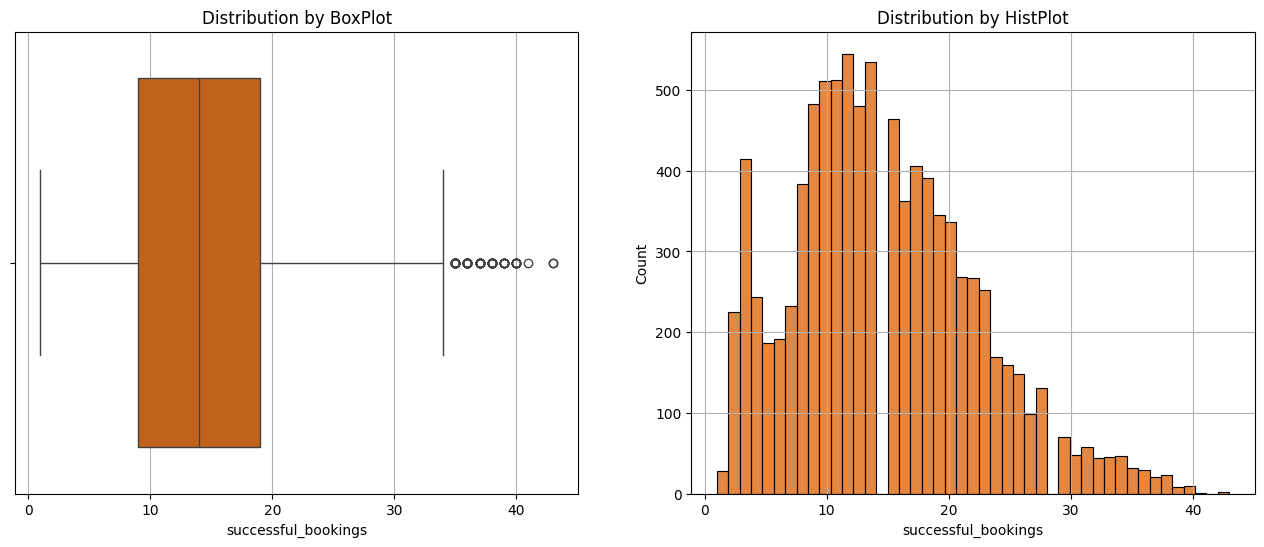

The Skew of Successful Bookings Data is: 0.55


In [249]:
# Create a BoxPlot and HistPlot to visualize distribution of 'successful_bookings' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=fact_aggregated_bookings, x='successful_bookings', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=fact_aggregated_bookings, x='successful_bookings', color='#DC5F00')
plt.title("Distribution by HistPlot")
# Display the chart
plt.show()
# Check the skewness of data in the "ev_sold" column
print(f"The Skew of Successful Bookings Data is: {round(fact_aggregated_bookings['successful_bookings'].skew(), 2)}")

**Comment:**
The data shows a skew of 0.3, indicating a slightly skewed but acceptable distribution. No significant outliers were detected, so the data is considered suitable for further analysis.

In [250]:
# check the outliers, find out the upper bound and lower bound of the "successful_bookings" column
bounds_successful_bookings = check_outlier(fact_aggregated_bookings, 'successful_bookings')
# print out the required information
print(f"lower bound is {bounds_successful_bookings['lower_bound'].values[0]}")
print(f"upper bound is {bounds_successful_bookings['upper_bound'].values[0]}")
print(f"total row is {bounds_successful_bookings['total_row'].values[0]}")
print(f"outlier row is {bounds_successful_bookings['outlier_row'].values[0]}")
print(f"percentage of successful bookings that are outliers is {bounds_successful_bookings['outliers_pct'].values[0]}%")

lower bound is -6.0
upper bound is 34.0
total row is 9200
outlier row is 124
percentage of successful bookings that are outliers is 1.35%


In [251]:
# filter rows with successful bookings greater than upper bound of successful bookings
outliers_successful_bookings = fact_aggregated_bookings[fact_aggregated_bookings['successful_bookings']>bounds_successful_bookings['upper_bound'].values[0]]
# Check how many rows are outliers
print(f"The total number of outliers is {outliers_successful_bookings.shape[0]}")

The total number of outliers is 124


In [252]:
# Merge over_upper_sold_quantity with dim_product table to get more products details
outliers_successful_bookings_by_property = outliers_successful_bookings.merge(dim_hotels, how='left', on='property_id', validate='many_to_one')
# count the outlier sold quantity values in each division
for i in outliers_successful_bookings_by_property['city'].unique():
    print("The number of successful_bookings Outliers for city ", i, "is ",
          str(outliers_successful_bookings_by_property[outliers_successful_bookings_by_property['city']==i]['city'].count())
          )

The number of successful_bookings Outliers for city  delhi is  22
The number of successful_bookings Outliers for city  mumbai is  61
The number of successful_bookings Outliers for city  bangalore is  12
The number of successful_bookings Outliers for city  hyderabad is  29


In [253]:
for i in outliers_successful_bookings_by_property['category'].unique():
    print("The number of successful_bookings Outliers for category ", i, "is ",
          str(outliers_successful_bookings_by_property[outliers_successful_bookings_by_property['category']==i]['category'].count())
          )

The number of successful_bookings Outliers for category  business is  64
The number of successful_bookings Outliers for category  luxury is  60


In [254]:
for i in outliers_successful_bookings_by_property['property_name'].unique():
    print("The number of successful_bookings Outliers for property name ", i, "is ",
          str(outliers_successful_bookings_by_property[outliers_successful_bookings_by_property['property_name']==i]['property_name'].count())
          )

The number of successful_bookings Outliers for property name  atliq palace is  42
The number of successful_bookings Outliers for property name  atliq grands is  13
The number of successful_bookings Outliers for property name  atliq city is  22
The number of successful_bookings Outliers for property name  atliq exotica is  25
The number of successful_bookings Outliers for property name  atliq blu is  17
The number of successful_bookings Outliers for property name  atliq bay is  5


##### "successful_bookings" Column

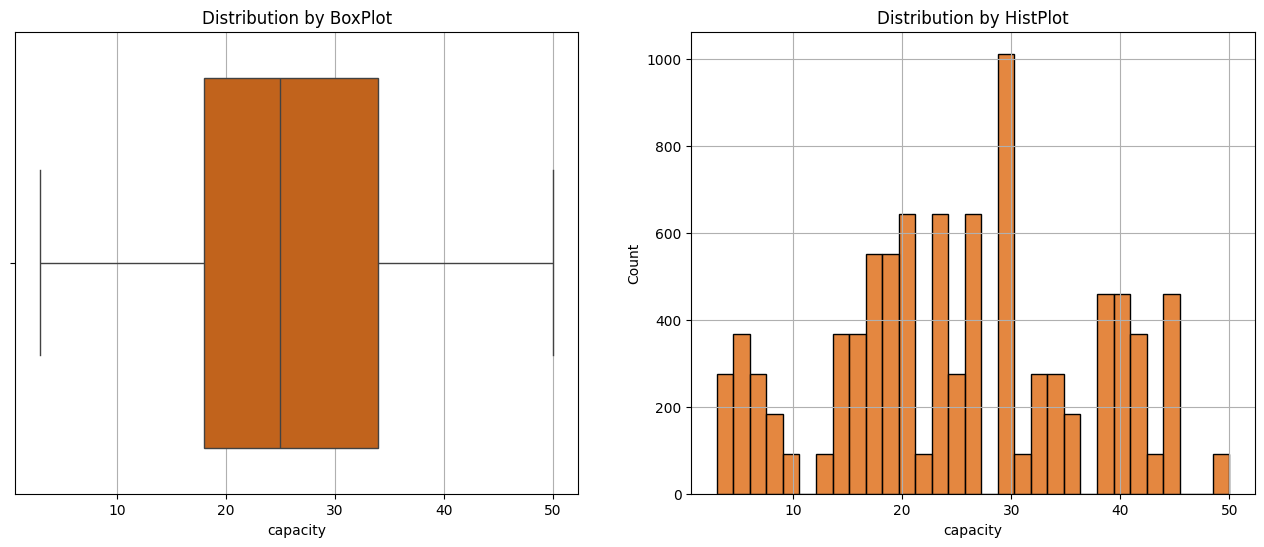

The Skew of Sold Quantity Data is: 0.0


In [255]:
# Create a BoxPlot and HistPlot to visualize distribution of 'capacity' and detect any outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=fact_aggregated_bookings, x='capacity', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=fact_aggregated_bookings, x='capacity', color='#DC5F00')
plt.title("Distribution by HistPlot")
# Display the chart
plt.show()
# Check the skewness of data in the "ev_sold" column
print(f"The Skew of Sold Quantity Data is: {round(fact_aggregated_bookings['capacity'].skew(), 2)}")

**Comment:**
The data shows a skew of 0. No Skew and No significant outliers were detected, so the data is considered suitable for further analysis.

In [256]:
fact_aggregated_bookings.nunique()

property_id            25
check_in_date          92
room_category           4
successful_bookings    42
capacity               38
dtype: int64

### "fact_bookings" DataFrame
This [dataset](link_git_hub) contains information about OnTime, InFull and OnTime Infull information aggregated at the order level per customer. There are 31729 rows, 6 columns, and these variables:

Variable    |   Description| 
-----|-----|
booking_id|This column represents the Unique Booking ID for each customer when they booked their rooms.
property_id|This column represents the Unique ID for each of the hotels.
booking_date|This column represents the date on which the customer booked their rooms.
check_in_date|This column represents the date on which the customer check-in (entered) at the hotel.
check_out_date|This column represents the date on which the customer check-out (left) of the hotel.
no_guests|This column represents the number of guests who stayed in a particular room in that hotel.
room_category|This column represents the type of room [RT1, RT2, RT3, RT4] in a hotel.
booking_platform|This column represents in which way the customer booked his room.
ratings_given|This column represents the ratings given by the customer for hotel services.
 booking_status|This column represents whether the customer cancelled his booking [Cancelled], successfully stayed in the hotel [Checked Out] or booked his room but not stayed in the hotel [No show].
 revenue_generated|This column represents the amount of money generated by the hotel from a particular customer.
 revenue_realized|This column represents the final amount of money that goes to the hotel based on booking status. If the booking status is cancelled, then 40% of the revenue generated is deducted and the remaining is refunded to the customer. If the booking status is Checked Out/No show, then full revenue generated will goes to hotels.

## Saving Cleaned Data

In [257]:
# Import dim_hotels
dim_hotels = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/processed/dim_hotels.csv")
# Import dim_rooms
dim_rooms = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/processed/dim_rooms.csv")
# Import dim_date
dim_date = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/processed/dim_date.csv")
# Import fact_order_lines
fact_bookings = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/processed/fact_bookings.csv")
# Import fact_aggregated_bookings
fact_aggregated_bookings = pd.read_csv("C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/processed/fact_aggregated_bookings.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/PC/Downloads/AtliQ_Grands_Hospitality_Revenue_Strategy_Project/data/processed/dim_hotels.csv'

# END!